# Modeling

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import __version__ as sklearn_version
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
#from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge



import xgboost as xgb

%matplotlib inline 

### Tabel of Content
1. [Load Data](#Load-Data)

- [Inspect data](#Inspect-data)
- [Assign variables into target and predictors](#Assign-variables-into-target-and-predictors)
2. [Split the dataset](#Split-the-dataset)
    - [Inspect the dimension](#Inspect-the-dimension)
3. [Scaling](#Scaling) 
    - [Transform scaled data](#Transform-scaled-data)
6. [Models](#Models)
    - [Linear Regression](#Linear-Regression) 
    - [Residual distribution graph](#Residual-distribution-graph)
    - [Train and test dataset distribution graph](#Train-and-test-dataset-distribution-graph)

    - [Ridge Regularization](#Ridge-Regularization)
    - [XGBoost](#XGBoost)
    - [Decision Tree Regression](#Decision-Tree-Regression)
    - [Random Forest Regression](#Random-Forest-Regression)
        - [Most important Features](#Most-important-Features)


## Load Data

In [2]:
df = pd.read_csv('cleaned_vehicles data_prep.csv')

#### Inspect data

In [3]:
df.head()

,cylinders,odometer,rating,year_difference,new_price,depreciation per year,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,...,condition_salvage,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,mpg_Low mpg (20 - 30),mpg_Medium mpg (30 - 40),size_full-size,size_mid-size,size_sub-compact
0,6,178054.0,4.3,10,25426.696,0.098696,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1,6,170259.0,4.1,7,29137.649,0.129970,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,4,86942.0,4.7,5,24223.771,0.117259,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,6,48932.0,4.1,5,29957.047,0.103149,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4,6,49858.0,4.1,4,30921.106,0.044906,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0


In [4]:
df = df.dropna()

In [5]:
# Minimum value of depreciation per year
df['depreciation per year'].min()

-0.034883758913167195


The negative value of depreciation per year reverse the context, that is the car values is appreciated or increase
in values such as Antique cars sold more than it was bought when new.

In [6]:
df.shape

(7488, 73)

### Assign variables into target and predictors

In [7]:
# Assign the data into dependent or target variable as y,  and predicator variables as X
#y = df['depreciation per year']
X = df.drop('depreciation per year', axis=1)
y= df['depreciation per year']


### Split the dataset

In [8]:
# Split the data into train and test, train_size is 0.7 using train_test_plit method, 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

### 2. Inspect the dimension

In [9]:
# Check the dimensions of training set meet the train size is 0.7
X_train.shape, X_test.shape

((5241, 72), (2247, 72))

In [10]:
X_train.columns

Index(['cylinders', 'odometer', 'rating', 'year_difference', 'new_price',
       'manufacturer_audi', 'manufacturer_bmw', 'manufacturer_buick',
       'manufacturer_cadillac', 'manufacturer_chevrolet',
       'manufacturer_chrysler', 'manufacturer_dodge', 'manufacturer_fiat',
       'manufacturer_ford', 'manufacturer_honda', 'manufacturer_hyundai',
       'manufacturer_infiniti', 'manufacturer_jaguar', 'manufacturer_kia',
       'manufacturer_lexus', 'manufacturer_lincoln', 'manufacturer_mazda',
       'manufacturer_mitsubishi', 'manufacturer_nissan', 'manufacturer_subaru',
       'manufacturer_volkswagen', 'manufacturer_volvo', 'drive_fwd',
       'drive_rwd', 'type_convertible', 'type_coupe', 'type_hatchback',
       'type_mini-van', 'type_offroad', 'type_other', 'type_pickup',
       'type_sedan', 'type_truck', 'type_van', 'type_wagon',
       'title_status_lien', 'title_status_missing', 'title_status_parts only',
       'title_status_rebuilt', 'title_status_salvage', 'paint_color_b

In [11]:
X_train.head()

,cylinders,odometer,rating,year_difference,new_price,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,condition_salvage,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,mpg_Low mpg (20 - 30),mpg_Medium mpg (30 - 40),size_full-size,size_mid-size,size_sub-compact
2313,4,193666.0,4.7,13,20462.171,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
6273,4,99515.0,4.6,8,18781.056,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4678,4,46000.0,4.3,4,15312.738,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4758,6,202000.0,4.6,12,26312.017,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
7157,6,111704.0,4.0,6,28854.630,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0


## Scaling

In [12]:
# Scale and transform the data 
scaler = StandardScaler()
scaler.fit(X_train)


StandardScaler()

## Transfrom scaled data

In [13]:
# Transform the scaled data
X_tr_scaled = scaler.transform(X_train)
X_te_scaled = scaler.transform(X_test)

# Models

## Linear Regression

In [14]:
# Apply linearRegression model and fit the X_tr_scaled.

lm = LinearRegression()
lm.fit(X_tr_scaled, y_train)

LinearRegression()

In [15]:
# Make perdictions using the model on both train and test splits.

y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

In [16]:
# Assess Model Performance using sklearn r2_score attribute.

print("Linear regression training score: {:.5f}".format(r2_score(y_train, y_tr_pred)))
print("Test score: {:.5f}".format( r2_score(y_test, y_te_pred)))


Linear regression training score: 0.44840
Test score: 0.42573


Both training and test datasets return nearly the same scores implies linear regression is not 
overfit by the training dataset.

In [17]:
# Compare the result sklearn library and funtioned defined above.
training_error, test_error = mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)
print('Linear regression training dataset mean absolute error: {:.5f} '.format(training_error))
print('Linear regression test dataset mean absolute error: {:.5f}'.format(test_error))
print('\n')

Linear regression training dataset mean absolute error: 0.02512 
Linear regression test dataset mean absolute error: 0.02691




In [18]:
# mean-squared-error from scaled dataset minimize the error
mse_training, mse_test = np.sqrt(mean_squared_error(y_train, y_tr_pred)), np.sqrt(mean_squared_error(y_test, y_te_pred))
print('Linear regression training dataset mean squaed error: {:.5f} '.format(mse_training))
print('Linear regression test dataset mean squared error: {:.5f}'.format(mse_test))
print('\n')

Linear regression training dataset mean squaed error: 0.03494 
Linear regression test dataset mean squared error: 0.03823




In [19]:
# mean sequare errror return negligble difference in training and test datasets reveal that there is no 
# indication for overfitting.

### Residual distribution graph

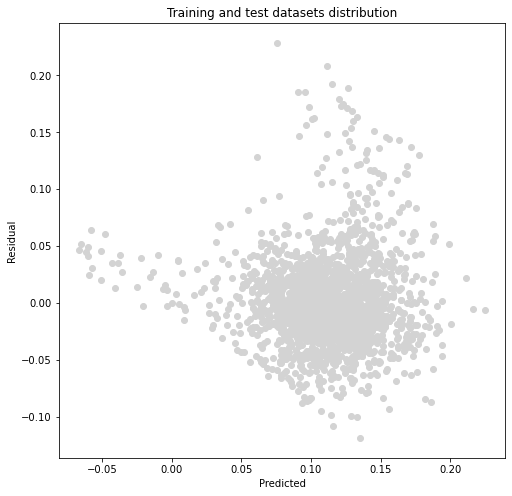

In [20]:
# Residual distribution
plt.figure(figsize=(8,8))
#plt.scatter(y_train,  y_tr_pred, color='cyan', marker="x")
plt.scatter(y_te_pred, (y_test - y_te_pred), color='lightgray')
plt.xlabel('Predicted')
plt.ylabel("Residual")
plt.title("Training and test datasets distribution")
plt.show()

In [21]:
# The distribution of residual versus predicted shows there is no association. Therefore errors are 
# independently to predicted values.

## Train and test dataset distribution graph

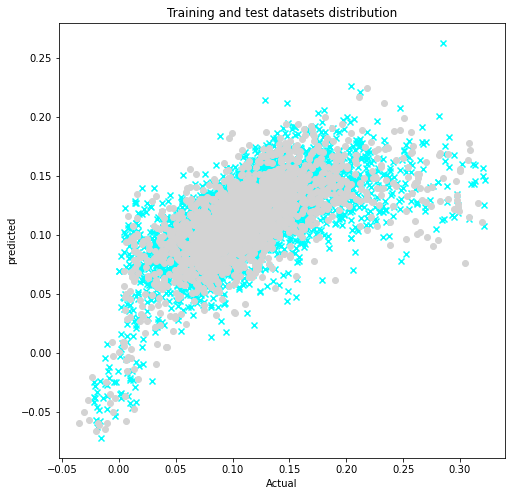

In [22]:
# Residual distribution
plt.figure(figsize=(8,8))
plt.scatter(y_train,  y_tr_pred, color='cyan', marker="x")
plt.scatter(y_test, y_te_pred, color='lightgray')
plt.xlabel('Actual')
plt.ylabel("predicted")
plt.title("Training and test datasets distribution")
plt.show()

The distribution shows data points from training and test datasets are overlaid with minimum extreme outliers in the training dataset, however, model performance is focus on the test data points
distribution.


## Using Pipeline

In [23]:
# Using linearRegression model to predict 'depreciation rate per year'
pipe = make_pipeline(
                    StandardScaler(),
                    #SelectKBest(), #afffect the score
                    LinearRegression())

In [24]:
# Fit the split trainig data
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

**Assess performance on train and test data**

In [25]:
# Compare result R^2 using the pipe line
y_tre_pred = pipe.predict(X_train)
y_tes_pred = pipe.predict(X_test)
r2_score(y_train, y_tre_pred), r2_score(y_test, y_tes_pred)

(0.4483973136397915, 0.42572848772741856)

In [26]:
# Compare the result sklearn library and funtioned defined above.
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(0.025115118311954086, 0.026914467094521395)

In [27]:
# mean-squared-error from scaled dataset minimize the error
mean_tr_error, mean_test_error = np.sqrt(mean_squared_error(y_train, y_tr_pred)), np.sqrt(mean_squared_error(y_test, y_te_pred))
print("training dataset: MSE {:.5f}".format(mean_tr_error))
print("test dataset MSE: {:.5f}".format(mean_test_error))
print('\n')

training dataset: MSE 0.03494
test dataset MSE: 0.03823




##### Pipeline function takes the standard functions as agrument and return the individual function outcome, just run all in one. 

In [28]:
# Using linearRegression model to predict 'depreciation rate per year'
pipe1 = make_pipeline(
                    StandardScaler(),
                    SelectKBest(), 
                    LinearRegression()
)

In [29]:
#Create a grid_params
grid_params = {'selectkbest__k':list(range(X_train.shape[1]))}
# GridSearch to the pipe line and param_grids with cross-validation 5 folds.
lr_gd_cv = GridSearchCV(pipe1, param_grid = grid_params,cv=5,n_jobs=-1)

In [30]:
%%time
# Fit train dataset to grid search output
result = lr_gd_cv.fit(X_train, y_train)

CPU times: user 2.6 s, sys: 302 ms, total: 2.9 s
Wall time: 1min 18s


/Users/temesgentesfay/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [31]:
# Assess scores
score_mean = result.cv_results_['mean_test_score']
score_std = result.cv_results_['std_test_score']
cv_k = [k for k in lr_gd_cv.cv_results_['param_selectkbest__k']]

In [32]:
# The best params attribut of lr-grid_cv
lr_gd_cv.best_params_ ,

({'selectkbest__k': 71},)

In [33]:
# The GridSearchCV score
print(" Linear regression GrideSearchCV best score: {:.5f}".format(lr_gd_cv.best_score_))

 Linear regression GrideSearchCV best score: 0.42782


In [34]:

selected = lr_gd_cv.best_estimator_.named_steps.selectkbest.get_support()

In [35]:
# Get the linear model coefficients from the `coef_` attribute and store in `coefs`,
# get the matching feature names from the column names of the dataframe,
# and display the results as a pandas Series with `coefs` as the values and `features` as the index,
# sorting the values in descending order
coefs = lr_gd_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending= False)

odometer                0.016351
drive_fwd               0.008094
condition_fair          0.007541
title_status_rebuilt    0.006256
type_sedan              0.005108
                          ...   
cylinders              -0.005440
manufacturer_subaru    -0.006009
rating                 -0.006850
manufacturer_honda     -0.009329
year_difference        -0.017250
Length: 71, dtype: float64

The correlation coefficient sorted based on the weights. However, features correlation with the target either positive or negative. From the linear regression, very few features have a weak positive and negative association with the target variable, and the remaining features have no association or zero correlation coefficient, which 
interprated as insignificant features.

## Ridge Regularization

In [36]:
# Ridge Regularization to minimize coefficient weight to enhance model performance.
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,test_size = 0.3, random_state=47) 
#%%time
alphas = [0.01, 0.1, 1, 10]
for alpha in alphas:
    ridge = Ridge(alpha=0.1, normalize=True) 
    ridge.fit(X_train, y_train)
    ridge_pred = ridge.predict(X_test)
   
    print(f"Ridge regularization score: {r2_score(y_test, ridge_pred)}")
    print("Ridge {} alphas, RMSE: {}".format(alpha, np.sqrt(mean_squared_error(y_test, ridge_pred))))
    print('\n')

Ridge regularization score: 0.42384167479869406
Ridge 0.01 alphas, RMSE: 0.03829229430749179


Ridge regularization score: 0.42384167479869406
Ridge 0.1 alphas, RMSE: 0.03829229430749179


Ridge regularization score: 0.42384167479869406
Ridge 1 alphas, RMSE: 0.03829229430749179


Ridge regularization score: 0.42384167479869406
Ridge 10 alphas, RMSE: 0.03829229430749179




Ridge returns minimum loss compared to linear regression.

## XGBoost

In [37]:
# Applying or Optimizing the model with XGBoost 

dmatrix = xgb.DMatrix(data=X,label=y) 

gbm_param_grid = {'learning_rate': [0.01,0.1,0.5,0.9],
                    'n_estimators': [200],
                    'subsample': [0.3, 0.5, 0.9]} 

gbm = xgb.XGBRegressor()
grid_mse = GridSearchCV(estimator=gbm,param_grid=gbm_param_grid, scoring ='r2', cv=4, verbose=1)
grid_mse.fit(X_train, y_train)
print("Best parameters found: ",grid_mse.best_params_) 
#print("The highest score found:  {} ".format(grid_mse.best_score_))
print("The best loss score found: {:.5f}".format(np.sqrt(np.abs(grid_mse.best_score_))))

Fitting 4 folds for each of 12 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  2.9min finished


Best parameters found:  {'learning_rate': 0.1, 'n_estimators': 200, 'subsample': 0.9}
The best loss score found: 0.77598


**XGBoost regression return the maximum score than any other algorithms.**

## Decision Tree Regression

In [38]:
# Single decision Tree and cross validated  scores using the defaul criterion (mse)
from sklearn.model_selection import cross_val_score

dt = DecisionTreeRegressor(random_state=47)
dt.fit(X_train, y_train)
dt_scores = cross_val_score(dt, X, y, cv=5)
print('Cross validated mean: %.5f' %(np.mean(dt_scores)))

#print('Mean score without CV:%.5f' %(dt.score(X_train, y_train)))
#print('\n')

Cross validated mean: 0.13712


In [39]:
# On the test or hold-out set 
# mean absolute error as criterion
y_pred = dt.predict(X_test)

print("R_square from single Decision Tree: {:.5f}".format(r2_score(y_test, dt.predict(X_test))))
#print("R_square from expected datasets: {:.5f} ".format( dt.score(X_test, y_test)))
#print('\n')

R_square from single Decision Tree: 0.17652


In [40]:
# The score is less from cross-validated 

In [41]:
print("Root mean squared error: {:.5f} ".format( np.sqrt(mean_squared_error(y_test, y_pred))))
#print("Mean absolute error: {:.5f}".format(mean_absolute_error(y_test, y_pred)))
#print('\n')

Root mean squared error: 0.04578 


In [42]:
# Apply GrideSearchCV on decision Tree with five-fold cross validation
param_grid = {"max_depth":range(2,20),'min_samples_split': range(2,20)}

gs = GridSearchCV(DecisionTreeRegressor(random_state=47 ),param_grid = param_grid,  cv=5)
gs.fit(X_train, y_train)

print('The best sample split: {}'.format(gs.best_params_))
print(f'GridSearch best score:  {gs.best_score_}')  
print('\n')

The best sample split: {'max_depth': 11, 'min_samples_split': 19}
GridSearch best score:  0.36719151265802097




In [43]:
# Scores from cross-validation using 'mae'criterion.
dt_ame = DecisionTreeRegressor(random_state=47, criterion='mae')
dt_ame.fit(X_train, y_train)
dt_ame_scores = cross_val_score(dt_ame, X, y, cv=5)
print("Cross validated decision trees: mean absolute error: {:.5f}". format(np.mean(dt_ame_scores)))


Cross validated decision trees: mean absolute error: 0.15056


## Random Forest Regression

In [44]:
# Define a pipleline
# UStandardScaler()
# Define randomeforestregressor as random state is 47
RF_pipe = make_pipeline(
                        StandardScaler(),
                        RandomForestRegressor(random_state=47)
                                         )

In [45]:
# Fit and assess the performance with Cross Validation
forest_cv_result = cross_validate(RF_pipe, X, y, cv=5)
forest_cv_result['score_time']

array([0.04894376, 0.07285881, 0.054245  , 0.05260682, 0.05251098])

In [46]:
# Range of cross validated scores
forest_cv_score = forest_cv_result['test_score']

In [47]:
# The mean score and standard error
np.mean(forest_cv_score), np.std(forest_cv_score)

(0.5754017835652107, 0.021410475618144603)

In [48]:
#Fit pipe line 
#%%time
RF_pipe.fit(X_train, y_train)
y_pred = RF_pipe.predict(X_test )

print("Mean absolute error:  {:.5f}: ".format( mean_absolute_error(y_test, y_pred)))
print("Root mean squared error:  {:.5f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('\n')

Mean absolute error:  0.02240: 
Root mean squared error:  0.03440




In [49]:
# Create grid_params dictionary 
grid_params = {
    "randomforestregressor__max_depth":[5,10,25,30, 40,50],
    'randomforestregressor__n_estimators': [10,50,100,200],
    'standardscaler':[StandardScaler(),None]
    #'simpleimputer__strategy':['mean', 'median']
}

In [50]:
# Apply Model GridSearchCV
forest_gd_cv = GridSearchCV(RF_pipe, param_grid = grid_params, cv=5, n_jobs=-1)

In [51]:
# Fit the model
forest_gd_cv.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [5, 10, 25, 30, 40,
                                                              50],
                         'randomforestregressor__n_estimators': [10, 50, 100,
                                                                 200],
                         'standardscaler': [StandardScaler(), None]})

In [52]:
#The best parameters as n_estimator equals to 200
forest_gd_cv.best_params_

{'randomforestregressor__max_depth': 40,
 'randomforestregressor__n_estimators': 200,
 'standardscaler': StandardScaler()}

In [53]:
# The accuracy score from hyperparameter tuning.
print('RandomForest best score:  {:3f}'.format(forest_gd_cv.best_score_))

RandomForest best score:  0.572449


Cross validation score a little higher than GridSearchcV but the difference is negligible, in such case
cross validation may perform in lieu of GridSearch to minimize computational cost.

In [54]:
forest_gd_cv.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=40, n_estimators=200,
                                       random_state=47))])

## Most important Features 

 1 year_difference 0.21837
 2 odometer   0.21059
 3 new_price  0.11969
 4 drive_fwd  0.05425
 5 rating     0.05359
 6 manufacturer_honda 0.03334
 7 title_status_rebuilt 0.02546
 8 type_sedan 0.02433
 9 condition_fair 0.01670
10 cylinders  0.01555


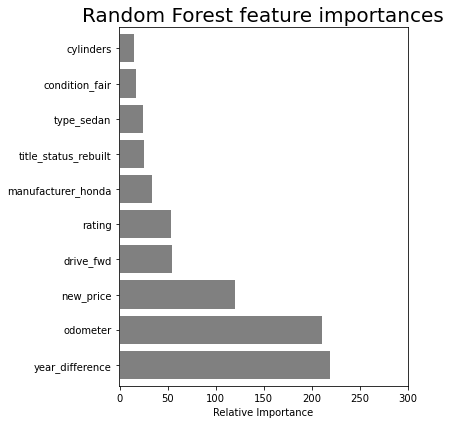

In [55]:
#Plot a barplot of the random forest's feature importances,
#assigning the feature_importances_` attribute of 
#`rf_grid_cv.best_estimator_.named_steps.randomforestregressor` to the name `imps` to then
#create a pandas Series object of the feature importances, with the index given by the
#training data column names, sorting the values 
#my_color = ['#bdd7e7','#6baed6','#2171b5','#08519c']
forest = RandomForestRegressor( random_state=47)
feature_labels = df.columns.drop('depreciation per year')
forest.fit(X_train, y_train)
importances = forest.feature_importances_
#assign value in ascending order
indices = np.argsort(importances)[: : -1][:10]
for i in range(len(indices)):
    print("%2d %-*s %.5f" %(i+1, 10, feature_labels[indices[i]], importances[indices[i]]))
plt.figure(figsize=(6, 6))
plt.title('Random Forest feature importances', fontsize=20)
plt.xlabel('Relative Importance')
plt.barh(range(len(indices)), importances[indices]*1000, color='gray')
plt.yticks(range(len(indices)),feature_labels[indices], rotation=0)
plt.xlim([-1, 300])
plt.tight_layout()
plt.margins(0.02)

**Conclusion**: 
XGBoost regressor retrieved the best score 77.59%, followed by Random forest 57.66%. Random forest regressors yield the most relevant features to the target variable, which is a key to optimize model performance and/or solving real problems. The features year_difference, odometer are the two top dominant features followed by new_price, rating, and drive_fwd features are the top fife features attributes 64% of the score versus the remaining sixty-seven features.  
